# Install CUDA 8 distribution specific - FAILED

This type of instalation failed on my machine. It could not build cuda samples.


## When to install it?

This is required if you want to have tensorflow with GPU support. Install it:
* if want to have GPU support
* if have decent GPU

## Is it worth to install it?
My old graphic card *GK107GLM* (announcement date 01.06.2012) does ~2 x faster than 8 cores of *i7-4810MQ CPU @ 2.80GHz*

## Terse giude
* https://www.tensorflow.org/install/install_linux
* Version does matter
    * install **CUDA® Toolkit 8.0**
    * install **cudnn 6**  (not 7) for cuda8


## Check if you have hardware
* List nvidia compatible devices
```
lspci | grep -i nvidia
```
* My device is *GK107GLM [Quadro K1100M]*
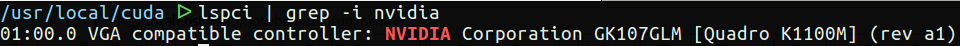
* Now check on below page if your device is supported
https://developer.nvidia.com/cuda-gpus
 

## Check what drivers are in use
Here **nvidia-384**

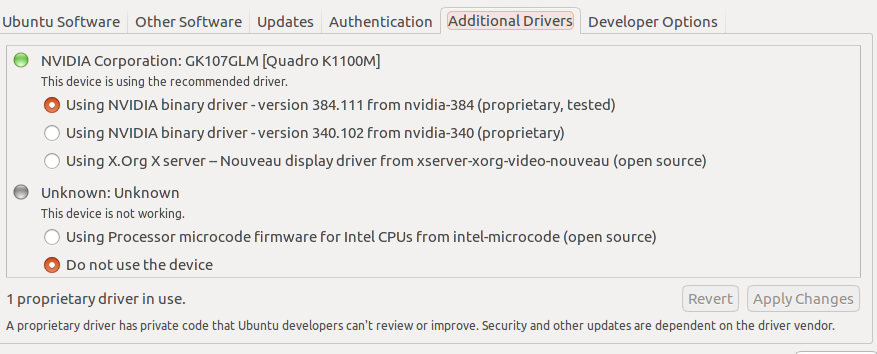

This shows phisical dirver libs:

```
usr/lib ᐅ ll | grep nvidia
-rw-r--r--   1 root root 1.7M Dec  9  2016 libnvidia-gtk3.so.375.26
-rw-r--r--   1 root root 1.7M Dec  9  2016 libnvidia-gtk2.so.375.26
drwxr-xr-x   2 root root 4.0K Nov 25 21:19 nvidia
drwxr-xr-x   2 root root 4.0K Jan 21 09:42 nvidia-384-prime
lrwxrwxrwx   1 root root   53 Jan 21 09:43 libvdpau_nvidia.so -> /etc/alternatives/x86_64-linux-gnu_libvdpau_nvidia.so
drwxr-xr-x   6 root root 4.0K Jan 21 09:43 nvidia-384
```


## Install *CUDA® Toolkit 8.0*

Follow steps from http://docs.nvidia.com/cuda/cuda-installation-guide-linux

### Below my experience when following above guide
#### OS version (must be **x86_64**)
```
/ ᐅ uname -m && cat /etc/*release
x86_64
DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=16.04
DISTRIB_CODENAME=xenial
DISTRIB_DESCRIPTION="Ubuntu 16.04.3 LTS"
NAME="Ubuntu"
VERSION="16.04.3 LTS (Xenial Xerus)"
ID=ubuntu
ID_LIKE=debian
PRETTY_NAME="Ubuntu 16.04.3 LTS"
VERSION_ID="16.04"
HOME_URL="http://www.ubuntu.com/"
SUPPORT_URL="http://help.ubuntu.com/"
BUG_REPORT_URL="http://bugs.launchpad.net/ubuntu/"
VERSION_CODENAME=xenial
UBUNTU_CODENAME=xenial
```
#### GCC Version - must be >= **5.3.1** on ubuntu **16.10**
```
/ ᐅ gcc --version
gcc (Ubuntu 5.4.0-6ubuntu1~16.04.5) 5.4.0 20160609
Copyright (C) 2015 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.
```
#### Kernel version (must be >= **4.4**)
```
/ ᐅ uname -r     
4.13.0-26-generic
```
#### Kernel Headers
```
/ ᐅ sudo apt-get install linux-headers-$(uname -r)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
linux-headers-4.13.0-26-generic is already the newest version (4.13.0-26.29~16.04.2).
The following packages were automatically installed and are no longer required:
  libprotoc9v5 libpython3-dev libpython3.5-dev linux-headers-4.10.0-40 linux-headers-4.10.0-40-generic linux-headers-4.8.0-36 linux-headers-4.8.0-36-generic
  linux-image-4.10.0-40-generic linux-image-4.8.0-36-generic linux-image-extra-4.10.0-40-generic linux-image-extra-4.8.0-36-generic python-pip-whl python3-dev
  python3-wheel python3.5-dev
Use 'sudo apt autoremove' to remove them.
0 to upgrade, 0 to newly install, 0 to remove and 25 not to upgrade.
```
#### Choose an Installation Method 
I've chosen **distribution specific**

#### Download cuda toolkit
* https://developer.nvidia.com/cuda-toolkit-archive
* find proper version - I did https://developer.nvidia.com/cuda-80-ga2-download-archive
* Select options as on image: 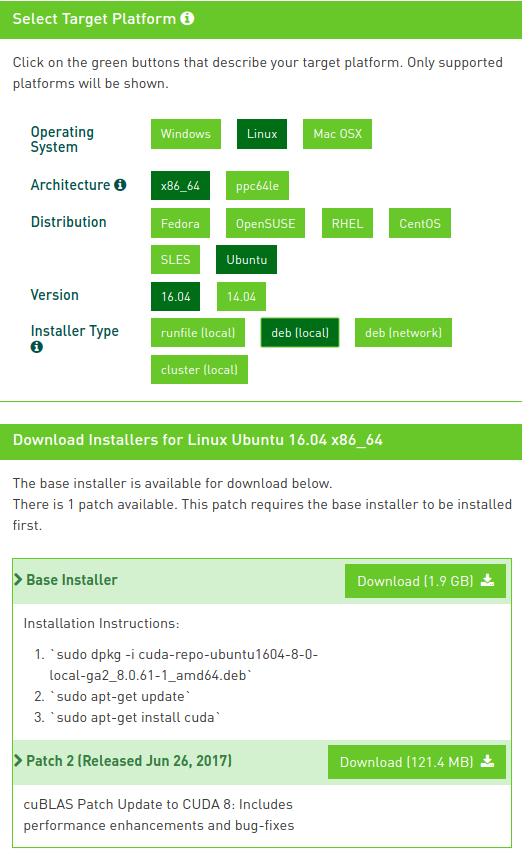
* Download *base installer* and *patch2*

#### Install base installer
```
~/Downloads ᐅ sudo dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb
(Reading database ... 304146 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64.deb ...
Unpacking cuda-repo-ubuntu1604-8-0-local-ga2 (8.0.61-1) over (8.0.61-1) ...
Setting up cuda-repo-ubuntu1604-8-0-local-ga2 (8.0.61-1) ...
OK
```

```
~/Downloads ᐅ sudo apt-get update
Get:1 file:/var/cuda-repo-8-0-local-cublas-performance-update  InRelease
Ign:1 file:/var/cuda-repo-8-0-local-cublas-performance-update  InRelease
...
```
(...yeah, here already installed)
```    
~/Downloads ᐅ sudo apt-get install cuda
Reading package lists... Done
Building dependency tree       
Reading state information... Done
cuda is already the newest version (8.0.61-1).
The following packages were automatically installed and are no longer required:
  libprotoc9v5 libpython3-dev libpython3.5-dev linux-headers-4.10.0-40 linux-headers-4.10.0-40-generic linux-headers-4.8.0-36 linux-headers-4.8.0-36-generic
  linux-image-4.10.0-40-generic linux-image-4.8.0-36-generic linux-image-extra-4.10.0-40-generic linux-image-extra-4.8.0-36-generic python-pip-whl python3-dev
  python3-wheel python3.5-dev
Use 'sudo apt autoremove' to remove them.
0 to upgrade, 0 to newly install, 0 to remove and 25 not to upgrade.
```

#### Install cuda patch

```
~/Downloads ᐅ sudo dpkg -i cuda-repo-ubuntu1604-8-0-local-cublas-performance-update_8.0.61-1_amd64.deb
(Reading database ... 304146 files and directories currently installed.)
Preparing to unpack cuda-repo-ubuntu1604-8-0-local-cublas-performance-update_8.0.61-1_amd64.deb ...
Unpacking cuda-repo-ubuntu1604-8-0-local-cublas-performance-update (8.0.61-1) over (8.0.61-1) ...
Setting up cuda-repo-ubuntu1604-8-0-local-cublas-performance-update (8.0.61-1) ...
OK
```

```
sudo apt-get update
...
```

```
sudo apt-get install cuda
...
```

#### See if installed
There should be something in **`/usr/local/cuda/`**

```
/usr/local/cuda/bin/nvcc --version
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2016 NVIDIA Corporation
Built on Tue_Jan_10_13:22:03_CST_2017
```

#### Post installation steps
**`PATH`** & **`LD_LIBRARY_PATH`** must be changed. Addto `.bashrc`:

```
export PATH=/usr/local/cuda/bin${PATH:+:${PATH}}
export LD_LIBRARY_PATH=/usr/local/cuda/lib64
```
Restart shell and see if can be run
```
nvcc --version
```
Check if LD_LIBRARY_PATH is changed: `echo ${LD_LIBRARY_PATH}`
        
#### Install cuda samples (don't ignore that step)

Possibly there are missing dependencies. Install them with:
```
sudo apt-get install g++ freeglut3-dev build-essential libx11-dev libxmu-dev libxi-dev libglu1-mesa libglu1-mesa-dev
```

Go to cuda samples dir:
```
/ ᐅ cd /usr/local/cuda/samples 
/usr/local/cuda/samples ᐅ     
```

(Optional, if trouble shooting) change nvidia driver version in samples:
* See what drivers are installed:
```
/ ᐅ dpkg -l | grep nvidia
ii  nvidia-375                                               384.111-0ubuntu0.16.04.1                     amd64        Transitional package for nvidia-384
ii  nvidia-375-dev                                           384.111-0ubuntu0.16.04.1                     amd64        Transitional package for nvidia-384-dev
ii  nvidia-384                                               384.111-0ubuntu0.16.04.1                     amd64        NVIDIA binary driver - version 384.111
ii  nvidia-384-dev                                           384.111-0ubuntu0.16.04.1                     amd64        NVIDIA binary Xorg driver development files
ii  nvidia-modprobe                                          375.26-0ubuntu1                              amd64        Load the NVIDIA kernel driver and create device files
ii  nvidia-opencl-icd-375                                    384.111-0ubuntu0.16.04.1                     amd64        Transitional package for nvidia-opencl-icd-384
ii  nvidia-opencl-icd-384                                    384.111-0ubuntu0.16.04.1                     amd64        NVIDIA OpenCL ICD
ii  nvidia-prime                                             0.8.2                                        amd64        Tools to enable NVIDIA's Prime
ii  nvidia-settings                                          375.26-0ubuntu1                              amd64        Tool for configuring the NVIDIA graphics driver
```
* Note the version in samples is **nvidia-367**:

```
/usr/local/cuda/samples ᐅ grep -r nvidia- .   
./2_Graphics/simpleGLES_EGLOutput/findgleslib.mk:    UBUNTU_PKG_NAME = "nvidia-367"
./2_Graphics/volumeFiltering/findgllib.mk:    UBUNTU_PKG_NAME = "nvidia-367"
./2_Graphics/Mandelbrot/findgllib.mk:    UBUNTU_PKG_NAME = "nvidia-367"
./2_Graphics/simpleGL/findgllib.mk:    UBUNTU_PKG_NAME = "nvidia-367"
...

```
* Replace **nvidia-367** with **nvidia-375**
```
find . -type f -execdir sed -i 's/UBUNTU_PKG_NAME = "nvidia-367"/UBUNTU_PKG_NAME = "nvidia-375"/g' '{}' \;
```
* See if version has been replaced
```
/usr/local/cuda/samples ᐅ grep -r nvidia- .                                                                                              
./2_Graphics/simpleGLES_EGLOutput/findgleslib.mk:    UBUNTU_PKG_NAME = "nvidia-375"
./2_Graphics/volumeFiltering/findgllib.mk:    UBUNTU_PKG_NAME = "nvidia-375"
./2_Graphics/Mandelbrot/findgllib.mk:    UBUNTU_PKG_NAME = "nvidia-375"
...
```


Build cuda samples (if something went wrong - `sudo make clean`):

```        
/usr/local/cuda/samples ᐅ sudo make      
make[1]: Entering directory '/usr/local/cuda-8.0/samples/0_Simple/simpleOccupancy'
/usr/local/cuda-8.0/bin/nvcc -ccbin g++ -I../../common/inc  -m64    -gencode arch=compute_20,code=sm_20 -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_60,code=compute_60 -o simpleOccupancy.o -c simpleOccupancy.cu
nvcc warning : The 'compute_20', 'sm_20', and 'sm_21' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
/usr/local/cuda-8.0/bin/nvcc -ccbin g++   -m64      -gencode arch=compute_20,code=sm_20 -gencode arch=compute_30,code=sm_30 -gencode arch=compute_35,code=sm_35 -gencode arch=compute_37,code=sm_37 -gencode arch=compute_50,code=sm_50 -gencode arch=compute_52,code=sm_52 -gencode arch=compute_60,code=sm_60 -gencode arch=compute_60,code=compute_60 -o simpleOccupancy simpleOccupancy.o 
nvcc warning : The 'compute_20', 'sm_20', and 'sm_21' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
mkdir -p ../../bin/x86_64/linux/release
cp simpleOccupancy ../../bin/x86_64/linux/release
make[1]: Leaving directory '/usr/local/cuda-8.0/samples/0_Simple/simpleOccupancy'


[...few minutes later]

make[1]: *** [cudaDecodeGL] Error 1
make[1]: Leaving directory '/usr/local/cuda-8.0/samples/3_Imaging/cudaDecodeGL'
Makefile:52: recipe for target '3_Imaging/cudaDecodeGL/Makefile.ph_build' failed
make: *** [3_Imaging/cudaDecodeGL/Makefile.ph_build] Error 2
```

Ehh, I'm giving up. Still having **Error 2**


Uninstalling it:

```
sudo apt-get --purge remove cuda
sudo apt-get autoremove
apt list --installed | grep cuda #verify what's left

```

#### ! Hold updates for cuda (otherwise when you run apt-get dist-upgrade it will ruin all setup :(
```
sudo apt-mark hold cuda

```
          
